In [112]:
from pyquil import Program, get_qc
from pyquil.gates import *
from pyquil.api import WavefunctionSimulator

In [93]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [94]:
max_depth = 20
shot_count = 1

def getPyQuilSimulator():
    return get_qc("20q-qvm")

def entangler(program,n):
    for i in range(n-1):
        program += RX(3,i+1).controlled(i)

def entanglerReverse(program,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            program += RX(np.pi/7,target).controlled(i)

def entanglerCX(program,n):
    for i in range(n-1):
        program += CNOT(i,i+1)

def entanglerReverseCX(program,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            program += CNOT(i,target)

def Rx(program,n):
    for i in range(n):
        program += RX(np.pi/3,i)

def Ry(program,n):
    for i in range(n):
        program += RY(np.pi/5,i)

def XY(program,n):
    for i in range(n):
        program += X(i)
        program += Y(i)

In [95]:
def test(i,j):
    p=Program()
    ro = p.declare('ro', 'BIT', i)
    for k in range(j):
        Rx(p,i)
        entangler(p,i)
        Ry(p,i)
        entanglerReverse(p,i)
    for m in range(i):
        p += MEASURE(m, ro[m])
    return p

In [121]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(2,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_p=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_p)
            aa = a.get('0',0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [122]:
i=3
j=3
p=test(i,j)
print(p)
p = p.wrap_in_numshots_loop(1024)

wf_sim = WavefunctionSimulator()
wavefunction = wf_sim.wavefunction(p)
wavefunction.get_outcome_probs()

# simulator = getPyQuilSimulator()
# results = simulator.run(p)

# counts = {}
# for result in results:
#     bs = "".join([str(r) for r in result])
#     counts[bs] = counts.get(bs, 0) + 1
# print(counts)

DECLARE ro BIT[3]
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]



{'000': 0.0,
 '001': 0.0,
 '010': 0.0,
 '011': 0.0,
 '100': 1.0,
 '101': 0.0,
 '110': 0.0,
 '111': 0.0}

In [123]:

wf_sim = WavefunctionSimulator()

def exec_func(sim, program):
    #return sim.run(program)
    return wf_sim.wavefunction(program).get_outcome_probs()

#simulator = getPyQuilSimulator()
depth=bench(wf_sim, max_depth, exec_func)
print(depth)

[100, 73, 48, 41, 33, 29, 24, 22, 18, 17, 15, 13, 12, 8, 7, 4, 2, 2]


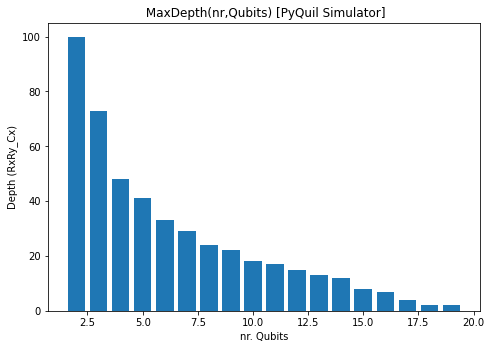

In [124]:
simulator_name='PyQuil Simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()